In [1]:
from constantes import ENDERECO_HYPERVOLUME_SOLUCOES_ENCONTRADAS
from constantes import ENDERECO_DATASET_SOLUCOES_ENCONTRADAS
from constantes import ENDERECO_IMAGENS
from constantes import ENDERECO_LATEX
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime

# AVALIAÇÃO

Constantes.

In [2]:
COLUNAS_ORDENACAO_HYPERVOLUME = ["HYPERVOLUME", "N_GEN", "POP_SIZE", "N_OFFSPRINGS"]

# Hypervolume

In [3]:
df_hypervolume = pd.read_csv(
    ENDERECO_HYPERVOLUME_SOLUCOES_ENCONTRADAS, sep=";", index_col=False, header=0
)
df_hypervolume.describe()

,POP_SIZE,N_OFFSPRINGS,N_GEN,HYPERVOLUME
count,31.000000,31.000000,31.000000,31.000000
mean,654.193548,450.516129,612.258065,0.773698
std,494.523503,352.193401,972.620891,0.038842
min,100.000000,30.000000,50.000000,0.711012
25%,100.000000,70.000000,100.000000,0.742310
50%,500.000000,350.000000,150.000000,0.775687
75%,1000.000000,700.000000,500.000000,0.801144
max,1500.000000,1050.000000,4000.000000,0.843222


In [4]:
df_hypervolume['TAXA_DESCENDENTES'] = round(df_hypervolume['N_OFFSPRINGS'] / df_hypervolume['POP_SIZE'], 2)
df_hypervolume

,ID,POP_SIZE,N_OFFSPRINGS,N_GEN,HYPERVOLUME,TIMESTAMP,TAXA_DESCENDENTES
0,.POP_SIZE_100.N_OFFSPRINGS_70.N_GEN_50,100,70,50,0.740585,2024-02-07 21:54:46.792327,0.7
1,.POP_SIZE_100.N_OFFSPRINGS_70.N_GEN_100,100,70,100,0.808558,2024-02-07 21:54:03.177422,0.7
2,.POP_SIZE_100.N_OFFSPRINGS_70.N_GEN_150,100,70,150,0.787160,2024-02-07 21:50:09.413527,0.7
3,.POP_SIZE_100.N_OFFSPRINGS_70.N_GEN_200,100,70,200,0.778881,2024-02-07 21:47:59.821582,0.7
4,.POP_SIZE_100.N_OFFSPRINGS_70.N_GEN_250,100,70,250,0.741541,2024-02-07 21:47:03.778726,0.7
5,.POP_SIZE_100.N_OFFSPRINGS_70.N_GEN_300,100,70,300,0.720393,2024-02-07 21:45:50.927742,0.7
6,.POP_SIZE_500.N_OFFSPRINGS_350.N_GEN_50,500,350,50,0.724343,2024-02-07 21:34:13.557719,0.7
7,.POP_SIZE_500.N_OFFSPRINGS_350.N_GEN_100,500,350,100,0.754016,2024-02-07 21:32:20.913598,0.7
8,.POP_SIZE_1000.N_OFFSPRINGS_700.N_GEN_50,1000,700,50,0.726822,2024-02-07 21:22:37.148527,0.7
9,.POP_SIZE_1000.N_OFFSPRINGS_700.N_GEN_100,1000,700,100,0.769755,2024-02-07 21:19:11.205053,0.7


In [5]:
buscar_quantidade_solucoes_por_id = lambda id: pd.read_csv(f'{ENDERECO_DATASET_SOLUCOES_ENCONTRADAS}{id}.csv', sep=';').shape[0]
df_qtd_solucoes = pd.DataFrame([{ 'ID':id, 'QTD_SOLUCOES': buscar_quantidade_solucoes_por_id(id) } for id in df_hypervolume['ID']])
df_hypervolume = df_hypervolume.merge(df_qtd_solucoes, 'inner', 'ID')
df_hypervolume

,ID,POP_SIZE,N_OFFSPRINGS,N_GEN,HYPERVOLUME,TIMESTAMP,TAXA_DESCENDENTES,QTD_SOLUCOES
0,.POP_SIZE_100.N_OFFSPRINGS_70.N_GEN_50,100,70,50,0.740585,2024-02-07 21:54:46.792327,0.7,51
1,.POP_SIZE_100.N_OFFSPRINGS_70.N_GEN_100,100,70,100,0.808558,2024-02-07 21:54:03.177422,0.7,55
2,.POP_SIZE_100.N_OFFSPRINGS_70.N_GEN_150,100,70,150,0.787160,2024-02-07 21:50:09.413527,0.7,76
3,.POP_SIZE_100.N_OFFSPRINGS_70.N_GEN_200,100,70,200,0.778881,2024-02-07 21:47:59.821582,0.7,100
4,.POP_SIZE_100.N_OFFSPRINGS_70.N_GEN_250,100,70,250,0.741541,2024-02-07 21:47:03.778726,0.7,100
5,.POP_SIZE_100.N_OFFSPRINGS_70.N_GEN_300,100,70,300,0.720393,2024-02-07 21:45:50.927742,0.7,100
6,.POP_SIZE_500.N_OFFSPRINGS_350.N_GEN_50,500,350,50,0.724343,2024-02-07 21:34:13.557719,0.7,82
7,.POP_SIZE_500.N_OFFSPRINGS_350.N_GEN_100,500,350,100,0.754016,2024-02-07 21:32:20.913598,0.7,130
8,.POP_SIZE_1000.N_OFFSPRINGS_700.N_GEN_50,1000,700,50,0.726822,2024-02-07 21:22:37.148527,0.7,82
9,.POP_SIZE_1000.N_OFFSPRINGS_700.N_GEN_100,1000,700,100,0.769755,2024-02-07 21:19:11.205053,0.7,151


In [6]:
df_hypervolume['PERCENT_SOL_ENCONTRADAS'] = df_hypervolume['QTD_SOLUCOES'] / df_hypervolume['POP_SIZE']
df_hypervolume

,ID,POP_SIZE,N_OFFSPRINGS,N_GEN,HYPERVOLUME,TIMESTAMP,TAXA_DESCENDENTES,QTD_SOLUCOES,PERCENT_SOL_ENCONTRADAS
0,.POP_SIZE_100.N_OFFSPRINGS_70.N_GEN_50,100,70,50,0.740585,2024-02-07 21:54:46.792327,0.7,51,0.510000
1,.POP_SIZE_100.N_OFFSPRINGS_70.N_GEN_100,100,70,100,0.808558,2024-02-07 21:54:03.177422,0.7,55,0.550000
2,.POP_SIZE_100.N_OFFSPRINGS_70.N_GEN_150,100,70,150,0.787160,2024-02-07 21:50:09.413527,0.7,76,0.760000
3,.POP_SIZE_100.N_OFFSPRINGS_70.N_GEN_200,100,70,200,0.778881,2024-02-07 21:47:59.821582,0.7,100,1.000000
4,.POP_SIZE_100.N_OFFSPRINGS_70.N_GEN_250,100,70,250,0.741541,2024-02-07 21:47:03.778726,0.7,100,1.000000
5,.POP_SIZE_100.N_OFFSPRINGS_70.N_GEN_300,100,70,300,0.720393,2024-02-07 21:45:50.927742,0.7,100,1.000000
6,.POP_SIZE_500.N_OFFSPRINGS_350.N_GEN_50,500,350,50,0.724343,2024-02-07 21:34:13.557719,0.7,82,0.164000
7,.POP_SIZE_500.N_OFFSPRINGS_350.N_GEN_100,500,350,100,0.754016,2024-02-07 21:32:20.913598,0.7,130,0.260000
8,.POP_SIZE_1000.N_OFFSPRINGS_700.N_GEN_50,1000,700,50,0.726822,2024-02-07 21:22:37.148527,0.7,82,0.082000
9,.POP_SIZE_1000.N_OFFSPRINGS_700.N_GEN_100,1000,700,100,0.769755,2024-02-07 21:19:11.205053,0.7,151,0.151000


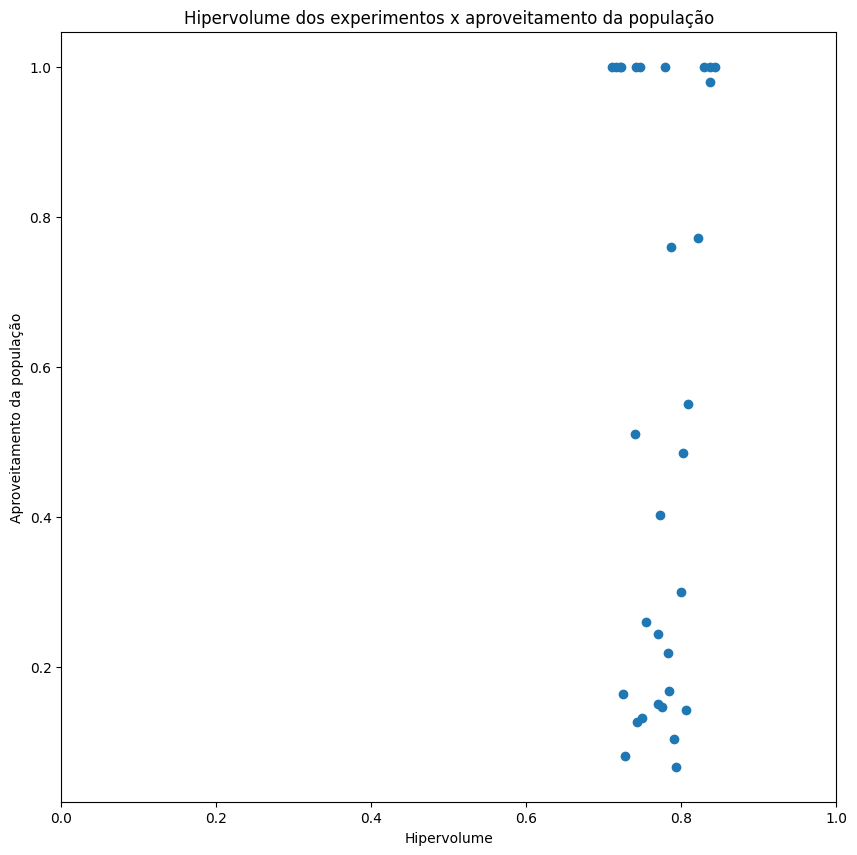

In [7]:
tmp = df_hypervolume.sort_values(by=['HYPERVOLUME', 'PERCENT_SOL_ENCONTRADAS'])[['HYPERVOLUME', 'PERCENT_SOL_ENCONTRADAS']]
plt.subplots(figsize=(10, 10))
plt.title('Hipervolume dos experimentos x aproveitamento da população')
plt.xlim(0, 1)
plt.xlabel('Hipervolume')
plt.ylabel('Aproveitamento da população')
plt.scatter(tmp['HYPERVOLUME'], tmp['PERCENT_SOL_ENCONTRADAS'])

In [8]:
df_hypervolume.sort_values(by=COLUNAS_ORDENACAO_HYPERVOLUME, ascending=False)

,ID,POP_SIZE,N_OFFSPRINGS,N_GEN,HYPERVOLUME,TIMESTAMP,TAXA_DESCENDENTES,QTD_SOLUCOES,PERCENT_SOL_ENCONTRADAS
30,.POP_SIZE_500.N_OFFSPRINGS_350.N_GEN_4000,500,350,4000,0.843222,2024-02-07 18:50:27.860962,0.7,500,1.000000
29,.POP_SIZE_500.N_OFFSPRINGS_350.N_GEN_3000,500,350,3000,0.837173,2024-02-07 17:20:02.915354,0.7,500,1.000000
28,.POP_SIZE_500.N_OFFSPRINGS_350.N_GEN_2000,500,350,2000,0.836912,2024-02-07 15:55:32.490520,0.7,490,0.980000
26,.POP_SIZE_1000.N_OFFSPRINGS_700.N_GEN_2000,1000,700,2000,0.829637,2024-02-07 09:12:32.784228,0.7,1000,1.000000
23,.POP_SIZE_1250.N_OFFSPRINGS_875.N_GEN_1000,1250,875,1000,0.821430,2024-02-07 01:47:23.277092,0.7,964,0.771200
1,.POP_SIZE_100.N_OFFSPRINGS_70.N_GEN_100,100,70,100,0.808558,2024-02-07 21:54:03.177422,0.7,55,0.550000
22,.POP_SIZE_1375.N_OFFSPRINGS_962.N_GEN_100,1375,962,100,0.806017,2024-02-07 19:22:04.414617,0.7,196,0.142545
19,.POP_SIZE_1000.N_OFFSPRINGS_700.N_GEN_500,1000,700,500,0.802671,2024-02-07 20:47:16.657075,0.7,485,0.485000
14,.POP_SIZE_100.N_OFFSPRINGS_30.N_GEN_150,100,30,150,0.799617,2024-02-07 21:52:51.285464,0.3,30,0.300000
12,.POP_SIZE_1500.N_OFFSPRINGS_1050.N_GEN_50,1500,1050,50,0.793297,2024-02-07 19:18:22.674652,0.7,101,0.067333


Text(0.5, 1.0, 'Correlação das características dos experimentos')

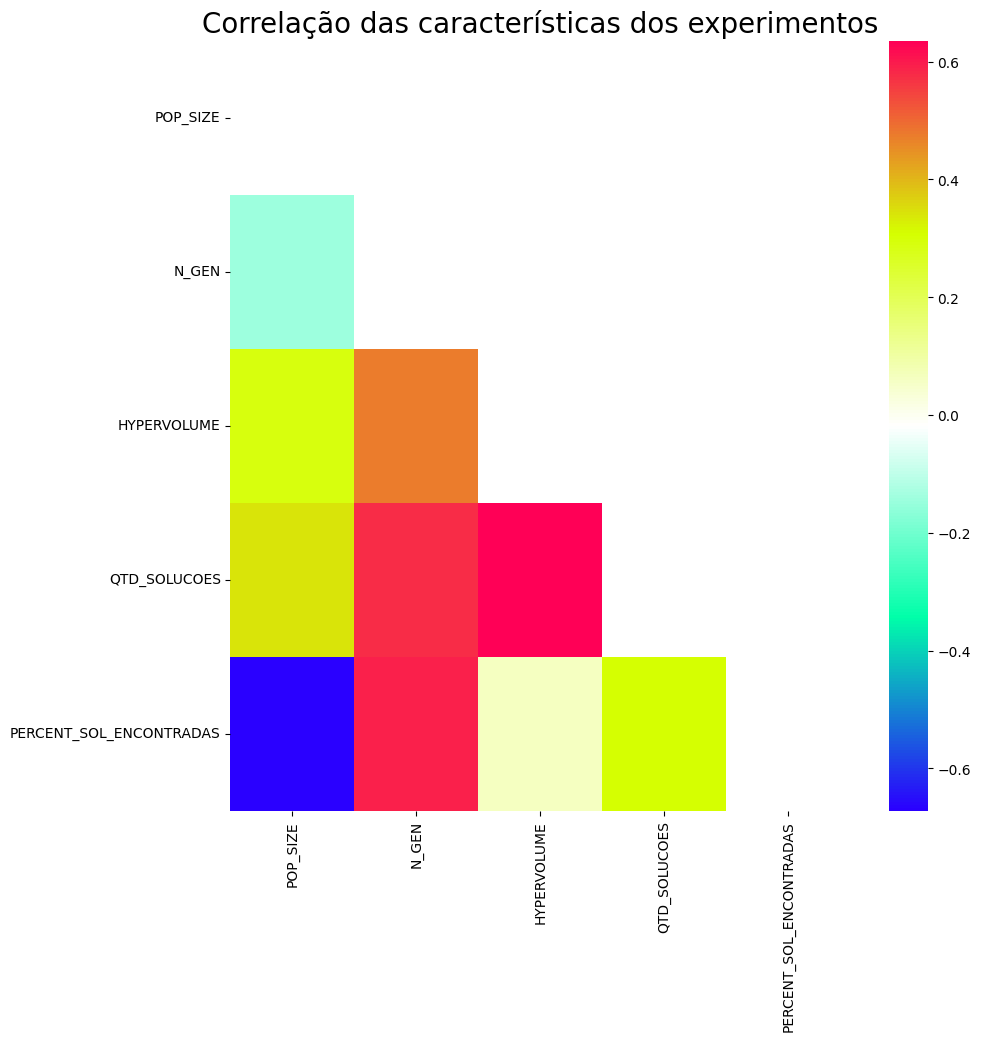

In [9]:
correlacao = df_hypervolume.sort_values(
    by=["POP_SIZE", "N_GEN", "N_OFFSPRINGS", "HYPERVOLUME"], ascending=False
)[
    [
        "POP_SIZE",
        "N_GEN",
        "HYPERVOLUME",
        "QTD_SOLUCOES",
        "PERCENT_SOL_ENCONTRADAS",
    ]
].corr('pearson')
labels = correlacao.to_numpy()
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(
    correlacao,
    mask=np.triu(np.ones_like(correlacao, dtype=bool)),
    cmap=sns.palettes.blend_palette(
        ["#2A00FF", "#00FFA9", "#FFFFFF", "#D5FF00", "#FF0056"], 60, ax
    ),
)
ax.set_title("Correlação das características dos experimentos", fontsize=20)

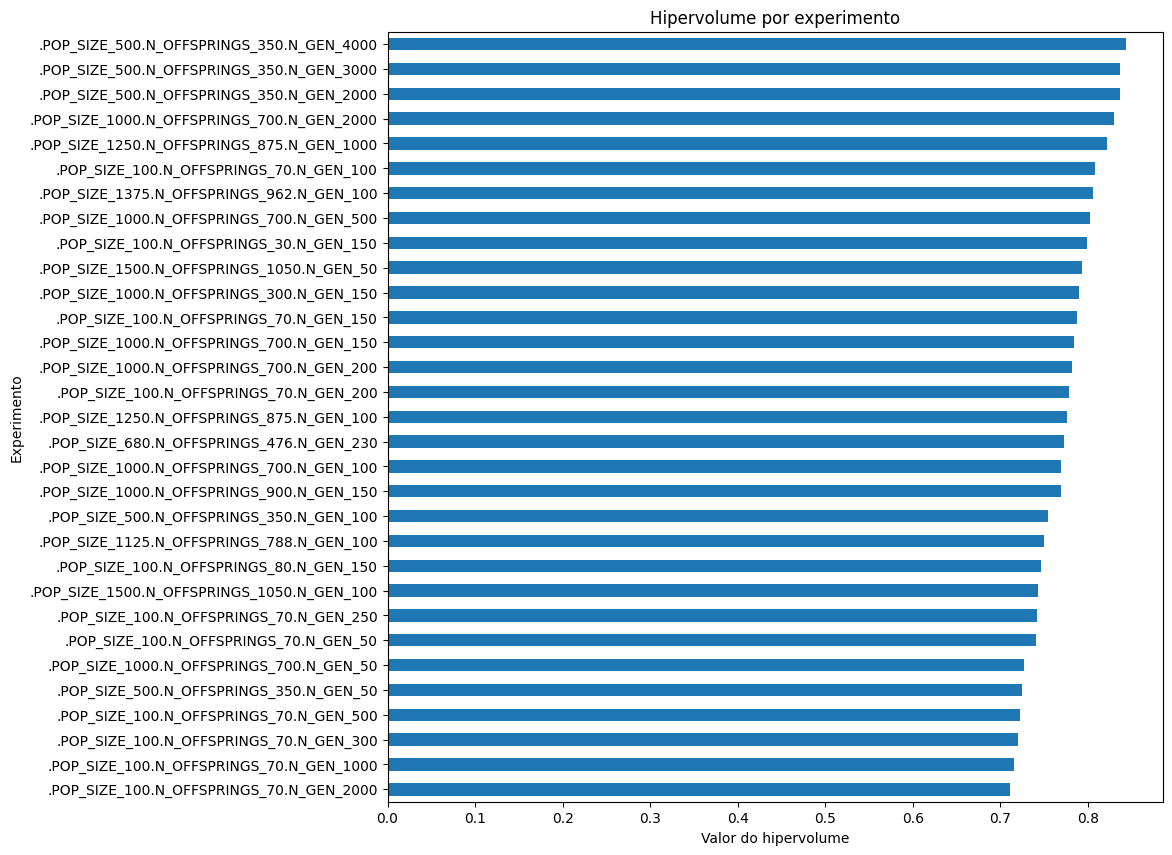

In [10]:
df_hypervolume.sort_values(by=COLUNAS_ORDENACAO_HYPERVOLUME, ascending=False)[
    ["POP_SIZE", "N_OFFSPRINGS", "N_GEN", "HYPERVOLUME", "ID"]
].reset_index().drop(columns="index").set_index('ID').sort_values(
    by=COLUNAS_ORDENACAO_HYPERVOLUME, ascending=True
)[
    ["HYPERVOLUME"]
].plot(
    figsize=(10, 10),
    kind="barh",
    title="Hipervolume por experimento",
    ylabel="Experimento",
    xlabel="Valor do hipervolume",
    legend=False,
)
plt.savefig(f"{ENDERECO_IMAGENS}grafico.hipervolume_por_experimento.png")

In [11]:
with open(f"{ENDERECO_LATEX}hipervolume_por_geracao.tex", "w") as f:
    f.write(
        df_hypervolume.sort_values(by=COLUNAS_ORDENACAO_HYPERVOLUME, ascending=False)[
            ["POP_SIZE", "N_OFFSPRINGS", "N_GEN", "HYPERVOLUME"]
        ]
        .reset_index()
        .drop(columns="index")
        .style.to_latex()
    )

# Soluções ótimas

In [12]:
id_melhor_solucao = (
    df_hypervolume.sort_values(by=COLUNAS_ORDENACAO_HYPERVOLUME).tail(1)["ID"].values[0]
)
id_melhor_solucao

'.POP_SIZE_500.N_OFFSPRINGS_350.N_GEN_4000'

In [13]:
df_otimas = pd.read_csv(
    f"{ENDERECO_DATASET_SOLUCOES_ENCONTRADAS}{id_melhor_solucao}.csv", sep=";"
)
df_otimas.head(3)

,F_SATISFACAO,F_ATIVIDADE,F_COMUNICACAO,Dev_10,Dev_19,Dev_21,Dev_26,Dev_30,Dev_32,Dev_34,...,Dev_280,Dev_292,Dev_310,Dev_322,Dev_329,Dev_343,Dev_346,Dev_430,Dev_459,Dev_488
0,1.052404,0.455378,0.837978,dotnet-api-docs,efcore,arcade,msbuild,docfx,docs,install-scripts,...,roslyn,orleans,EntityFramework.Docs,runtime,INDEFINIDO,maui,sdk,aspire,INDEFINIDO,maintenance-packages
1,1.014500,0.447053,0.908762,INDEFINIDO,fsharp,install-scripts,csharplang,EntityFramework.Docs,tye,msbuild,...,aspnetcore,razor,runtime,dotnet-api-docs,INDEFINIDO,interactive,roslyn,AspNetCore.Docs,aspire,arcade
2,1.039929,0.462983,0.836193,msbuild,efcore,docs,INDEFINIDO,sdk,arcade,install-scripts,...,runtime,orleans,INDEFINIDO,AspNetCore.Docs,csharplang,core,maui,INDEFINIDO,installer,aspnetcore


In [14]:
df_otimas = pd.read_csv(
    f"./solucoes/solucoes_encontradas{id_melhor_solucao}.csv", sep=";"
)
id_otima_satisfacao = df_otimas.sort_values("F_SATISFACAO", ascending=True).index[0]
id_otima_satisfacao

3

In [15]:
df_otimas = pd.read_csv(
    f"./solucoes/solucoes_encontradas{id_melhor_solucao}.csv", sep=";"
)
id_otima_atividade = df_otimas.sort_values("F_ATIVIDADE", ascending=True).index[0]
id_otima_atividade

4

In [16]:
df_otimas = pd.read_csv(
    f"./solucoes/solucoes_encontradas{id_melhor_solucao}.csv", sep=";"
)
id_otima_comunicacao = df_otimas.sort_values("F_COMUNICACAO", ascending=True).index[0]
id_otima_comunicacao

2

In [17]:
df_relevantes = df_otimas[
    df_otimas.index.isin(
        [id_otima_satisfacao, id_otima_atividade, id_otima_comunicacao]
    )
]
df_relevantes

,F_SATISFACAO,F_ATIVIDADE,F_COMUNICACAO,Dev_10,Dev_19,Dev_21,Dev_26,Dev_30,Dev_32,Dev_34,...,Dev_280,Dev_292,Dev_310,Dev_322,Dev_329,Dev_343,Dev_346,Dev_430,Dev_459,Dev_488
2,1.039929,0.462983,0.836193,msbuild,efcore,docs,INDEFINIDO,sdk,arcade,install-scripts,...,runtime,orleans,INDEFINIDO,AspNetCore.Docs,csharplang,core,maui,INDEFINIDO,installer,aspnetcore
3,1.014276,0.452500,0.906274,INDEFINIDO,interactive,orleans,maui,install-scripts,tye,core,...,docs,razor,runtime,fsharp,arcade,dotnet-api-docs,roslyn,AspNetCore.Docs,sdk,aspire
4,1.040161,0.435152,0.898547,EntityFramework.Docs,install-scripts,docfx,tye,dotnet-api-docs,orleans,project-system,...,arcade,installer,AspNetCore.Docs,winforms,docs,maintenance-packages,aspire,aspnetcore,runtime,roslyn


In [18]:
df_melhores_solucoes_por_dimensao = (
    df_relevantes.transpose()
    .rename(
        columns={
            id_otima_satisfacao: "MELHOR_SOLUCAO_SATISFACAO",
            id_otima_atividade: "MELHOR_SOLUCAO_ATIVIDADE",
            id_otima_comunicacao: "MELHOR_SOLUCAO_COMUNICACAO",
        }
    )
    .reset_index()
    .rename(columns={"index": "CARACTERISTICA"})
)
df_melhores_solucoes_por_dimensao

,CARACTERISTICA,MELHOR_SOLUCAO_COMUNICACAO,MELHOR_SOLUCAO_SATISFACAO,MELHOR_SOLUCAO_ATIVIDADE
0,F_SATISFACAO,1.039929,1.014276,1.040161
1,F_ATIVIDADE,0.462983,0.4525,0.435152
2,F_COMUNICACAO,0.836193,0.906274,0.898547
3,Dev_10,msbuild,INDEFINIDO,EntityFramework.Docs
4,Dev_19,efcore,interactive,install-scripts
5,Dev_21,docs,orleans,docfx
6,Dev_26,INDEFINIDO,maui,tye
7,Dev_30,sdk,install-scripts,dotnet-api-docs
8,Dev_32,arcade,tye,orleans
9,Dev_34,install-scripts,core,project-system


In [19]:
with open(f"{ENDERECO_LATEX}melhores_solucoes_por_dimensao.tex", "w") as f:
    f.write(df_melhores_solucoes_por_dimensao.style.to_latex())